<a href="https://colab.research.google.com/github/DajeanArcila/biblioteca_pandas/blob/main/case_marketing_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Settings

## Libraries

In [ ]:
import sklearn
print(sklearn.__version__)

1.2.2


In [ ]:
sklearn.set_config(transform_output='pandas')

In [ ]:
import pandas as pd

## Functions

## Load dataset

In [ ]:
df = pd.read_csv('Telecom_Churn.xls', index_col='customerID')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data understanding

- Missing values
- Duplicated values
- Assess data types
- Univariate analysis (distribution)
- Bivariate analysis (distribution for each feature vs target)
- Multivariate analysis (e.g., correlation)
- Imbalanced classes

By analyzing the distributions, we can look for:
- Distinct patterns in the target
- Low-frequent categories
- Outliers

In [ ]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.duplicated().sum()

22

In [ ]:
df[df.duplicated(keep=False)].sort_values(df.columns.tolist())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
9728-FTTVZ,Female,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.20,69.2,Yes
7660-HDPJV,Female,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.20,69.2,Yes
4702-IOQDC,Female,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.10,70.1,Yes
0328-GRPMV,Female,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.10,70.1,Yes
2619-WFQWU,Female,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,70.15,70.15,Yes
9985-MWVIX,Female,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,70.15,70.15,Yes
2866-IKBTM,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,19.55,No
8605-ITULD,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,19.55,No
7721-DVEKZ,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.65,19.65,No


In [ ]:
df.index.duplicated().any()

False

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df['TotalCharges'].describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(7043, 20)

In [ ]:
df = df.dropna()

In [ ]:
df.shape

(7032, 20)

In [ ]:
# list comprehension with conditional

# # Maneira 1

# minha_lista = []
# for numeric_feature in NUMERICAL_FEATURES:
#   if numeric_feature.startswith('t'):
#     feature = f'numeric_{numeric_feature}'
#     minha_lista.append(feature)

# minha_lista

In [ ]:
# # Maneira 2
#  [f'numeric_{numeric_feature}' for numeric_feature in NUMERICAL_FEATURES if numeric_feature.startswith('t')]

In [ ]:
NUMERICAL_FEATURES = ['tenure', 'MonthlyCharges', 'TotalCharges']
CATEGORICAL_FEATURES = [col for col in df.columns if col not in NUMERICAL_FEATURES+['Churn']]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

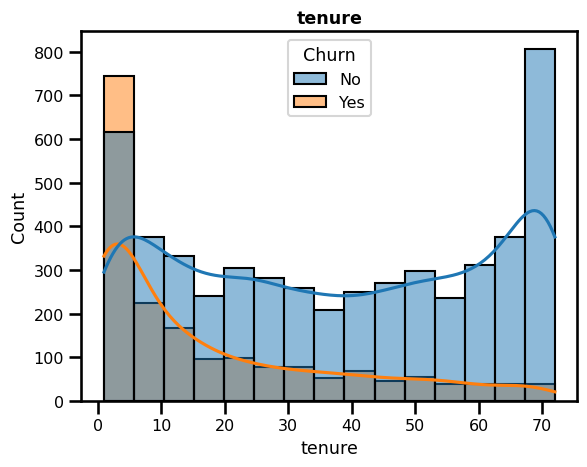

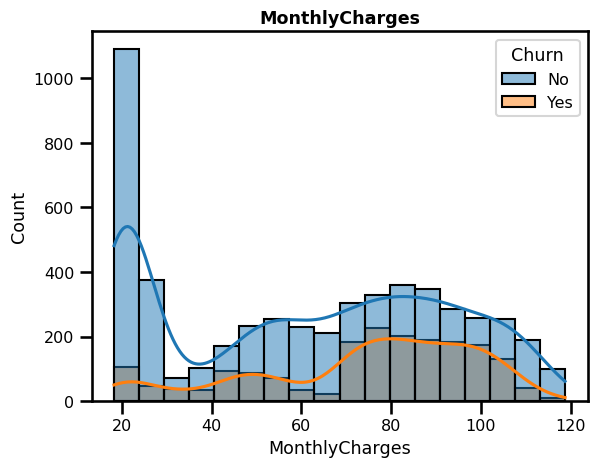

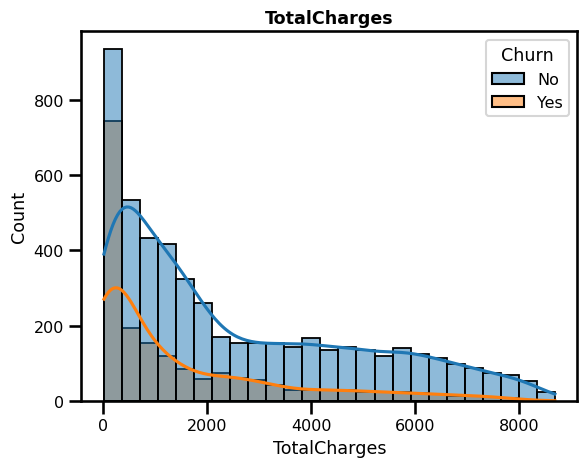

In [ ]:
with sns.plotting_context(context='talk', font_scale=.7):
  for numeric_features in NUMERICAL_FEATURES:
    sns.histplot(data=df, x=numeric_features, hue='Churn', kde=True)
    plt.title(numeric_features, weight='bold')
    plt.show()

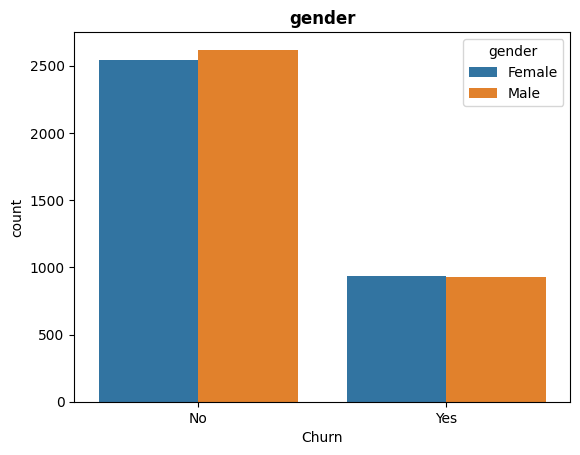

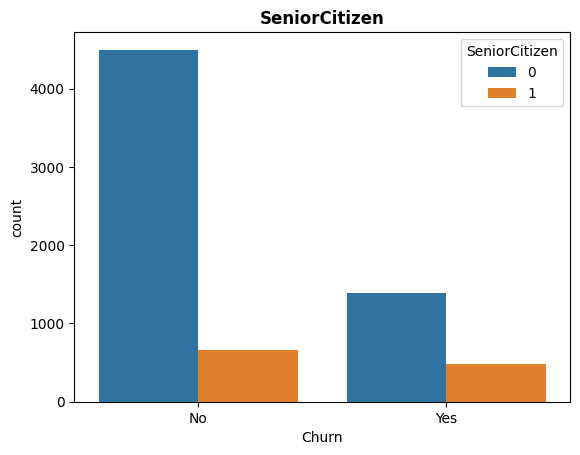

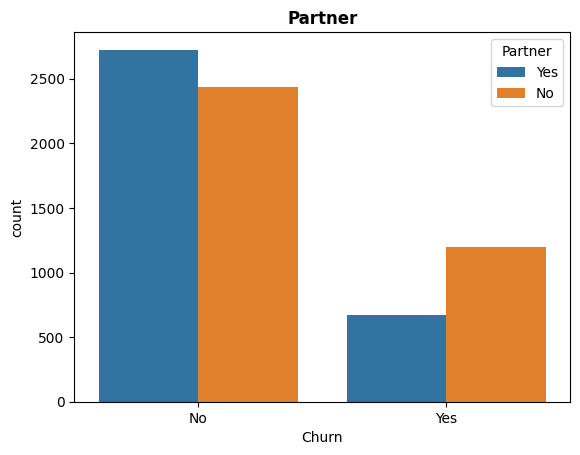

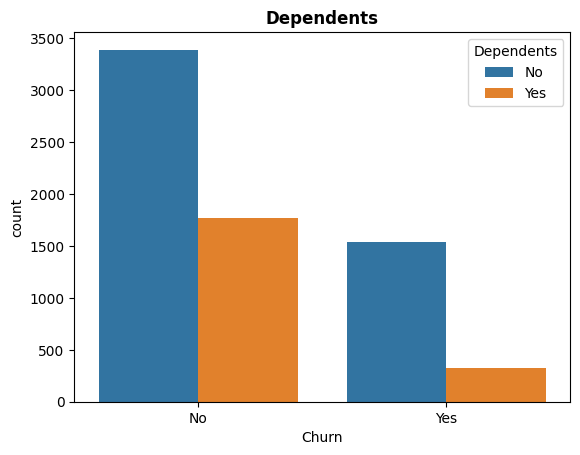

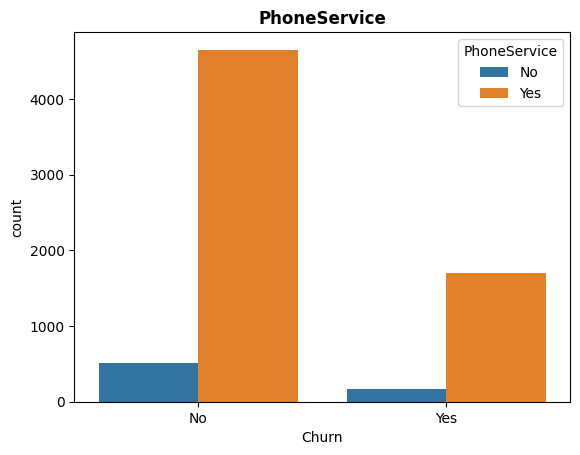

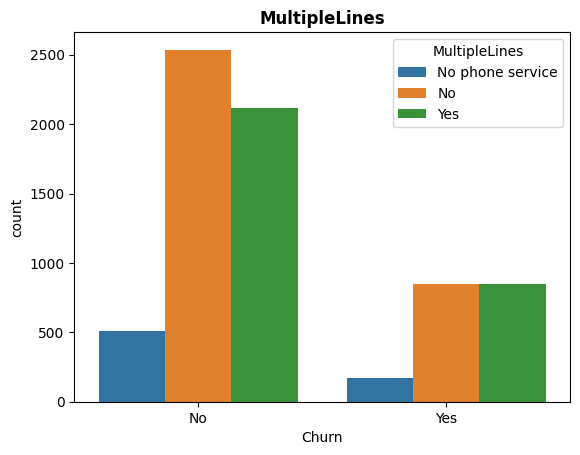

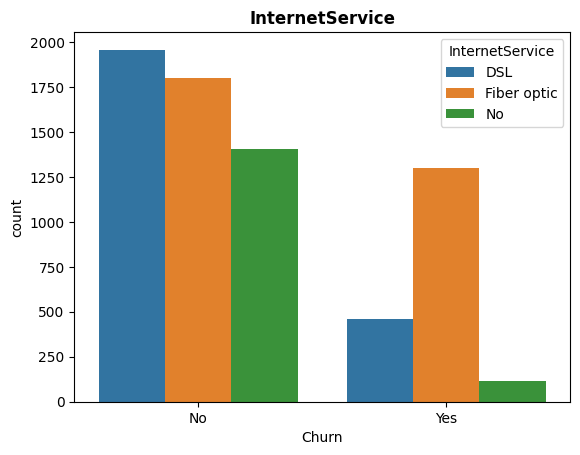

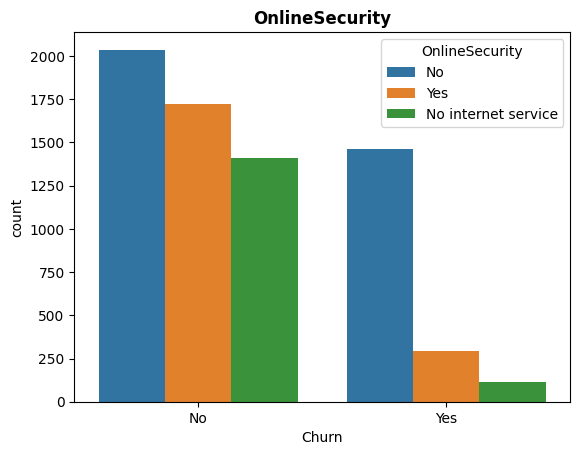

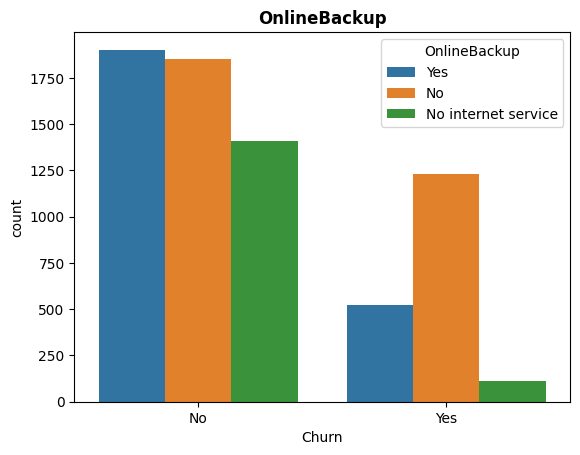

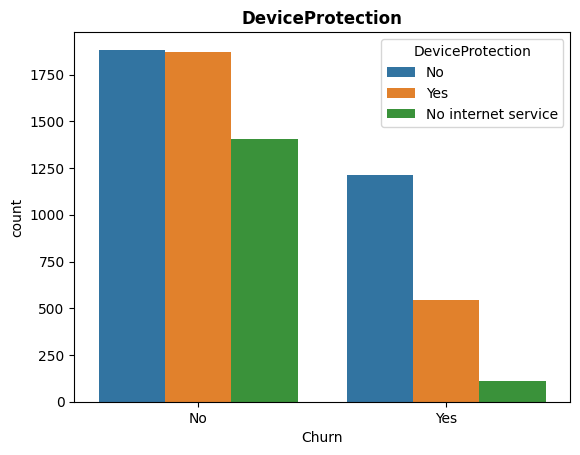

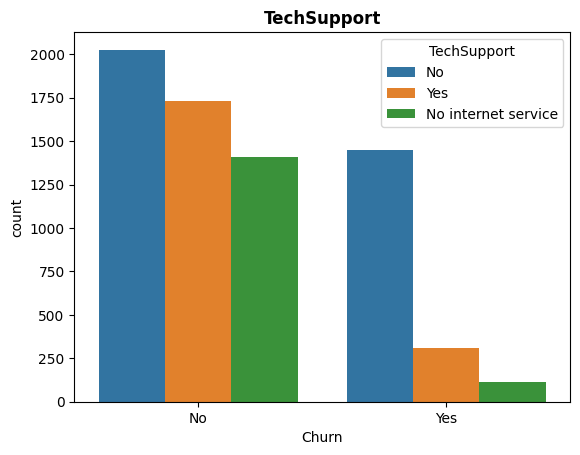

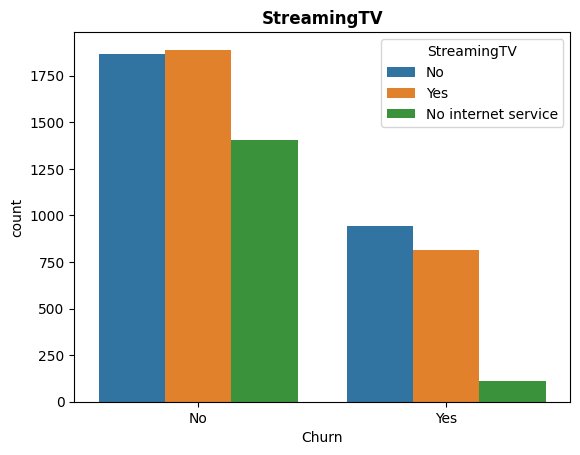

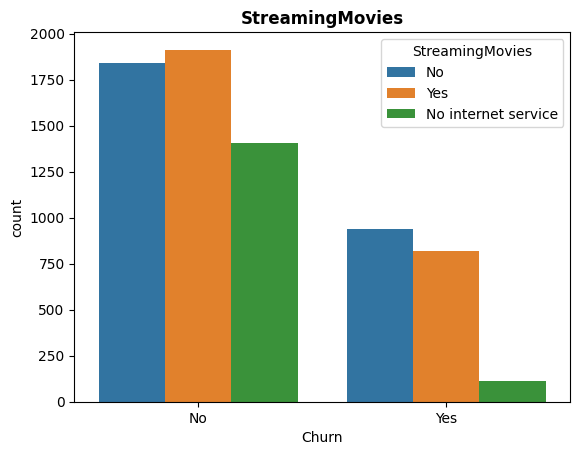

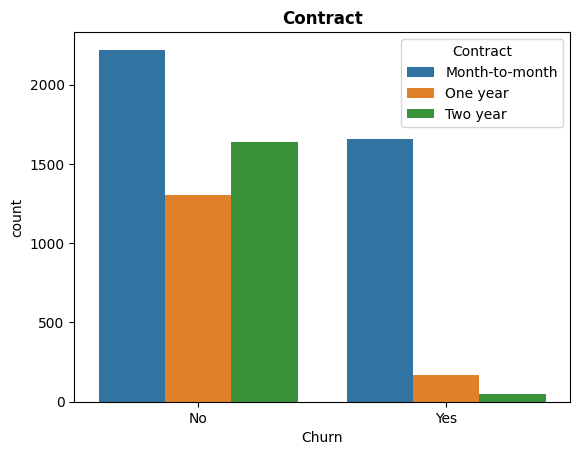

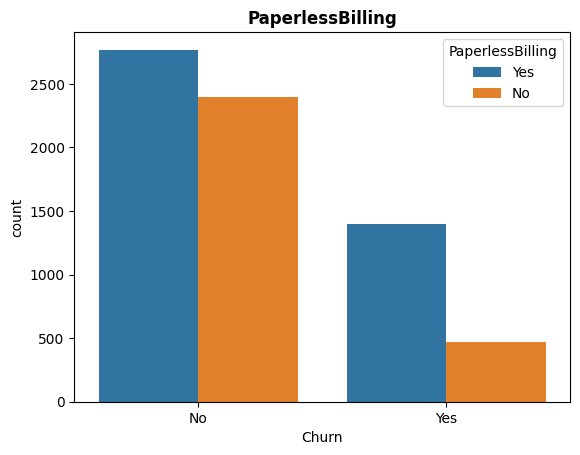

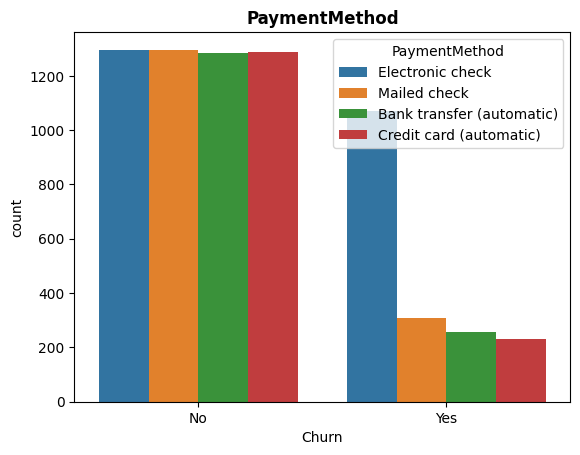

In [ ]:
for categorical_feature in CATEGORICAL_FEATURES:
  sns.countplot(data=df, x='Churn', hue=categorical_feature)
  plt.title(categorical_feature, weight='bold')
  plt.show()

# Preprocessing

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [ ]:
NUMERICAL_FEATURES = [
    'tenure',
    'MonthlyCharges',
    'TotalCharges'
    ]

CATEGORICAL_FEATURES = [
  # 'gender',
  'SeniorCitizen',
  'Partner',
  'Dependents',
  # 'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod'
]

FEATURES = NUMERICAL_FEATURES+CATEGORICAL_FEATURES
TARGET = 'Churn'

In [ ]:
df['Churn'] = df['Churn'].replace({'No':0, 'Yes':1})

In [ ]:
X = df[FEATURES]
y = df[TARGET]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
onehot = OneHotEncoder(sparse_output=False)

# ColumnTransformer aceita uma lista de tuplas com 3 elementos:
# 1 - nome da etapa, 2 - transformer 3- colunas para aplicar o transformer
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), NUMERICAL_FEATURES),
    ('cat', onehot, CATEGORICAL_FEATURES)
])

preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['tenure', 'MonthlyCharges', 'TotalCharges']),
                                ('cat', OneHotEncoder(sparse_output=False),
                                 ['SeniorCitizen', 'Partner', 'Dependents',
                                  'MultipleLines', 'InternetService',
                                  'OnlineSecurity', 'OnlineBackup',
                                  'DeviceProtection', 'TechSupport',
                                  'StreamingTV', 'StreamingMovies', 'Contract',
                                  'PaperlessBilling', 'PaymentMethod'])])

In [ ]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['tenure', 'MonthlyCharges', 'TotalCharges']),
                                ('cat', OneHotEncoder(sparse_output=False),
                                 ['SeniorCitizen', 'Partner', 'Dependents',
                                  'MultipleLines', 'InternetService',
                                  'OnlineSecurity', 'OnlineBackup',
                                  'DeviceProtection', 'TechSupport',
                                  'StreamingTV', 'StreamingMovies', 'Contract',
                                  'PaperlessBilling', 'PaymentMethod'])])

In [ ]:
# # Se fosse fazer manualmente...

# scaler = StandardScaler()
# encoder = OneHotEncoder(sparse_output=False)

# scaler.fit(X_train[NUMERICAL_FEATURES])
# encoder.fit(X_train[CATEGORICAL_FEATURES])

# X_train_num_transformed = scaler.transform(X_train[NUMERICAL_FEATURES])
# X_train_cat_transformed = encoder.transform(X_train[CATEGORICAL_FEATURES])

# X_train_transformed = pd.concat([X_train_num_transformed, X_train_cat_transformed], axis=1)
# X_train_transformed

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.

In [ ]:
scaler.fit(X_train[NUMERICAL_FEATURES])

StandardScaler()

In [ ]:
scaler.scale_

array([  24.56841467,   30.16172021, 2276.52202976])

# Modeling

In [ ]:
from sklearn.dummy import DummyClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

customerID
7590-VHVEG    0
5575-GNVDE    0
3668-QPYBK    1
7795-CFOCW    0
9237-HQITU    1
             ..
6840-RESVB    0
2234-XADUH    0
4801-JZAZL    0
8361-LTMKD    1
3186-AJIEK    0
Name: Churn, Length: 7032, dtype: int64

In [ ]:
dummy_model = DummyClassifier()

In [ ]:
# transformer / estimator

In [ ]:
# lista de tuplas com dois valores: 1 - nome da etapa e 2 - transformer/modelo

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', dummy_model)
])

model_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['SeniorCitizen', 'Partner',
                                                   'Dependents',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('model', DummyClassifier())])

In [ ]:
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['SeniorCitizen', 'Partner',
                                                   'Dependents',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('model', DummyClassifier())])

In [ ]:
model_pipeline.predict(X_test)

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype='<U2')

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
cv_results = cross_validate(model_pipeline, X_train, y_train, cv=5, scoring=['accuracy', 'recall', 'precision', 'f1'])

pd.DataFrame(cv_results)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

,fit_time,score_time,test_accuracy,test_recall,test_precision,test_f1
0,0.085181,0.092192,0.733649,0.0,0.0,0.0
1,0.131949,0.113323,0.733649,0.0,0.0,0.0
2,0.156585,0.100249,0.733649,0.0,0.0,0.0
3,0.205620,0.112109,0.733649,0.0,0.0,0.0
4,0.232709,0.137417,0.733397,0.0,0.0,0.0


<Axes: >

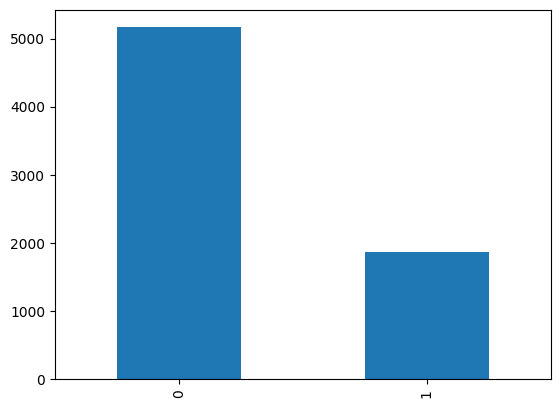

In [ ]:
df['Churn'].value_counts().plot.bar()

In [ ]:
# Regressão Logística
lr_model = LogisticRegression(max_iter=500)

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', lr_model)
])

cv_results = cross_validate(model_pipeline, X_train, y_train, cv=5, scoring=['accuracy', 'recall', 'precision', 'f1'])
pd.DataFrame(cv_results).mean()

fit_time          0.252283
score_time        0.066415
test_accuracy     0.809442
test_recall       0.562989
test_precision    0.669112
test_f1           0.611399
dtype: float64

In [ ]:
# Random Forest
rf_model = RandomForestClassifier()

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', rf_model)
])

cv_results = cross_validate(model_pipeline, X_train, y_train, cv=5, scoring=['accuracy', 'recall', 'precision', 'f1'])
pd.DataFrame(cv_results).mean()

fit_time          1.154797
score_time        0.071020
test_accuracy     0.788584
test_recall       0.501068
test_precision    0.630143
test_f1           0.558054
dtype: float64

In [ ]:
# Regressão Logística lidando com desbalanceamento
lr_model = LogisticRegression(max_iter=500, class_weight='balanced')

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', lr_model)
])

cv_results = cross_validate(model_pipeline, X_train, y_train, cv=5, scoring=['accuracy', 'recall', 'precision', 'f1'])
pd.DataFrame(cv_results).mean()

fit_time          0.342895
score_time        0.077694
test_accuracy     0.751425
test_recall       0.805694
test_precision    0.521746
test_f1           0.633220
dtype: float64

In [ ]:
# Random Forest lidando com desbalanceamento
rf_model = RandomForestClassifier(class_weight='balanced')

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', rf_model)
])

cv_results = cross_validate(model_pipeline, X_train, y_train, cv=5, scoring=['accuracy', 'recall', 'precision', 'f1'])
pd.DataFrame(cv_results).mean()

fit_time          1.115100
score_time        0.083994
test_accuracy     0.789912
test_recall       0.481851
test_precision    0.641579
test_f1           0.550017
dtype: float64

In [ ]:
from yellowbrick.classifier import classification_report
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.classifier import confusion_matrix

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

In [ ]:
# Regressão Logística lidando com desbalanceamento - pipeline final
lr_model = LogisticRegressionCV(max_iter=500, class_weight='balanced')

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', lr_model)
])

cv_results = cross_validate(model_pipeline, X_train, y_train, cv=5, scoring=['accuracy', 'recall', 'precision', 'f1'])
pd.DataFrame(cv_results).mean()

fit_time          1.387830
score_time        0.031309
test_accuracy     0.751994
test_recall       0.787189
test_precision    0.522947
test_f1           0.628294
dtype: float64

In [ ]:
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['SeniorCitizen', 'Partner',
                                                   'Dependents',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('model',
                 LogisticRegressionCV(class_weight='balanced', max_iter=500))])

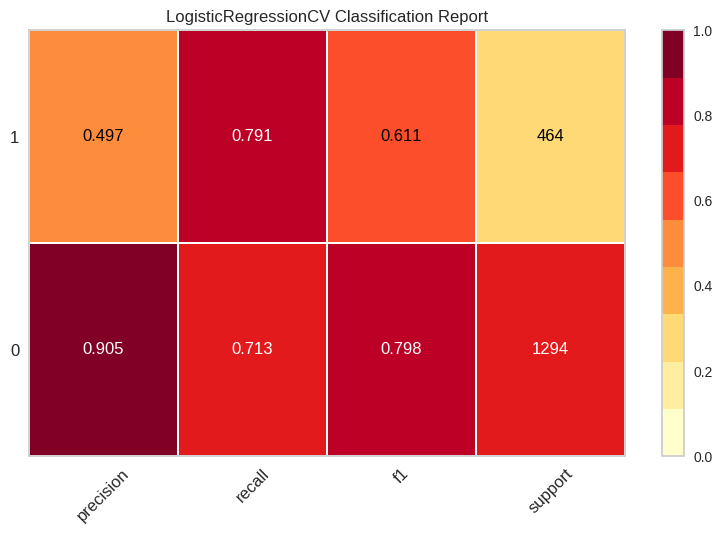

ClassificationReport(ax=<Axes: title={'center': 'LogisticRegressionCV Classification Report'}>,
                     cmap=<matplotlib.colors.ListedColormap object at 0x7c7ed4ddf7f0>,
                     estimator=Pipeline(steps=[('preprocessor',
                                                ColumnTransformer(transformers=[('num',
                                                                                 StandardScaler(),
                                                                                 ['tenure',
                                                                                  'MonthlyCharges',
                                                                                  'TotalCharges']),
                                                                                ('cat',
                                                                                 OneHotEncoder(sparse_output=False),
                                                                                 ['SeniorCitizen',
                                                                                  'Partner',
                                                                                  'Dependents',
                                                                                  'MultipleLines',
                                                                                  'InternetService',
                                                                                  'OnlineSecurity',
                                                                                  'OnlineBackup',
                                                                                  'DeviceProtection',
                                                                                  'TechSupport',
                                                                                  'StreamingTV',
                                                                                  'StreamingMovies',
                                                                                  'Contract',
                                                                                  'PaperlessBilling',
                                                                                  'PaymentMethod'])])),
                                               ('model',
                                                LogisticRegressionCV(class_weight='balanced',
                                                                     max_iter=500))]),
                     support=True)

In [ ]:
classification_report(
    model_pipeline, X_train, y_train, X_test, y_test, support=True
)

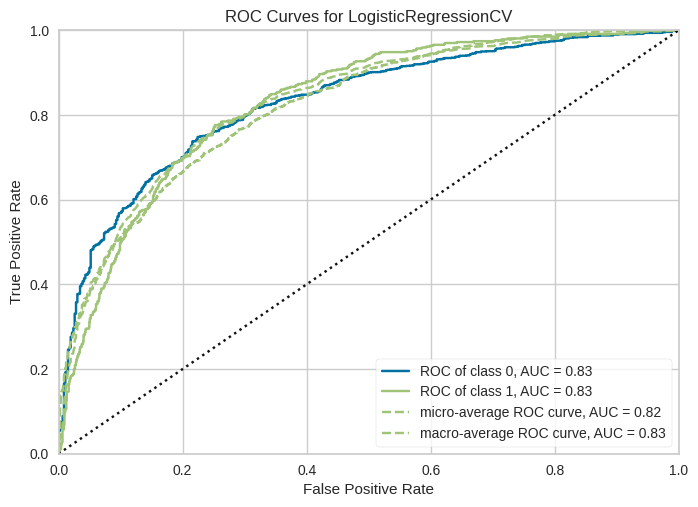

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for LogisticRegressionCV'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=Pipeline(steps=[('preprocessor',
                                  ColumnTransformer(transformers=[('num',
                                                                   StandardScaler(),
                                                                   ['tenure',
                                                                    'MonthlyCharges',
                                                                    'TotalCharges']),
                                                                  ('cat',
                                                                   OneHotEncoder(sparse_output=False),
                                                                   ['SeniorCitizen',
                                                                    'Partner',
                                                                    'Dependents',
                                                                    'MultipleLines',
                                                                    'InternetService',
                                                                    'OnlineSecurity',
                                                                    'OnlineBackup',
                                                                    'DeviceProtection',
                                                                    'TechSupport',
                                                                    'StreamingTV',
                                                                    'StreamingMovies',
                                                                    'Contract',
                                                                    'PaperlessBilling',
                                                                    'PaymentMethod'])])),
                                 ('model',
                                  LogisticRegressionCV(class_weight='balanced',
                                                       max_iter=500))]))

In [ ]:
roc_auc(model_pipeline, X_train, y_train, X_test=X_test, y_test=y_test)

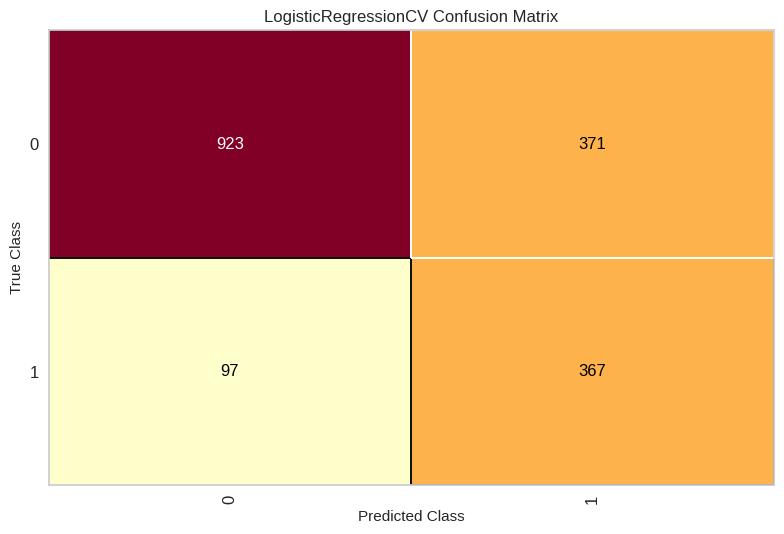

ConfusionMatrix(ax=<Axes: title={'center': 'LogisticRegressionCV Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                cmap=<matplotlib.colors.ListedColormap object at 0x7c7ed33079a0>,
                estimator=Pipeline(steps=[('preprocessor',
                                           ColumnTransformer(transformers=[('num',
                                                                            StandardScaler(),
                                                                            ['tenure',
                                                                             'MonthlyCharges',
                                                                             'TotalCharges']),
                                                                           ('cat',
                                                                            OneHotEncoder(sparse_output=False),
                                                                            ['SeniorCitizen',
                                                                             'Partner',
                                                                             'Dependents',
                                                                             'MultipleLines',
                                                                             'InternetService',
                                                                             'OnlineSecurity',
                                                                             'OnlineBackup',
                                                                             'DeviceProtection',
                                                                             'TechSupport',
                                                                             'StreamingTV',
                                                                             'StreamingMovies',
                                                                             'Contract',
                                                                             'PaperlessBilling',
                                                                             'PaymentMethod'])])),
                                          ('model',
                                           LogisticRegressionCV(class_weight='balanced',
                                                                max_iter=500))]))

In [ ]:
confusion_matrix(
    model_pipeline,
    X_train, y_train, X_test, y_test,
)

In [ ]:
lr_model = model_pipeline.named_steps['model']

In [ ]:
feature_names_in = [feature.split('__')[1] for feature in lr_model.feature_names_in_]

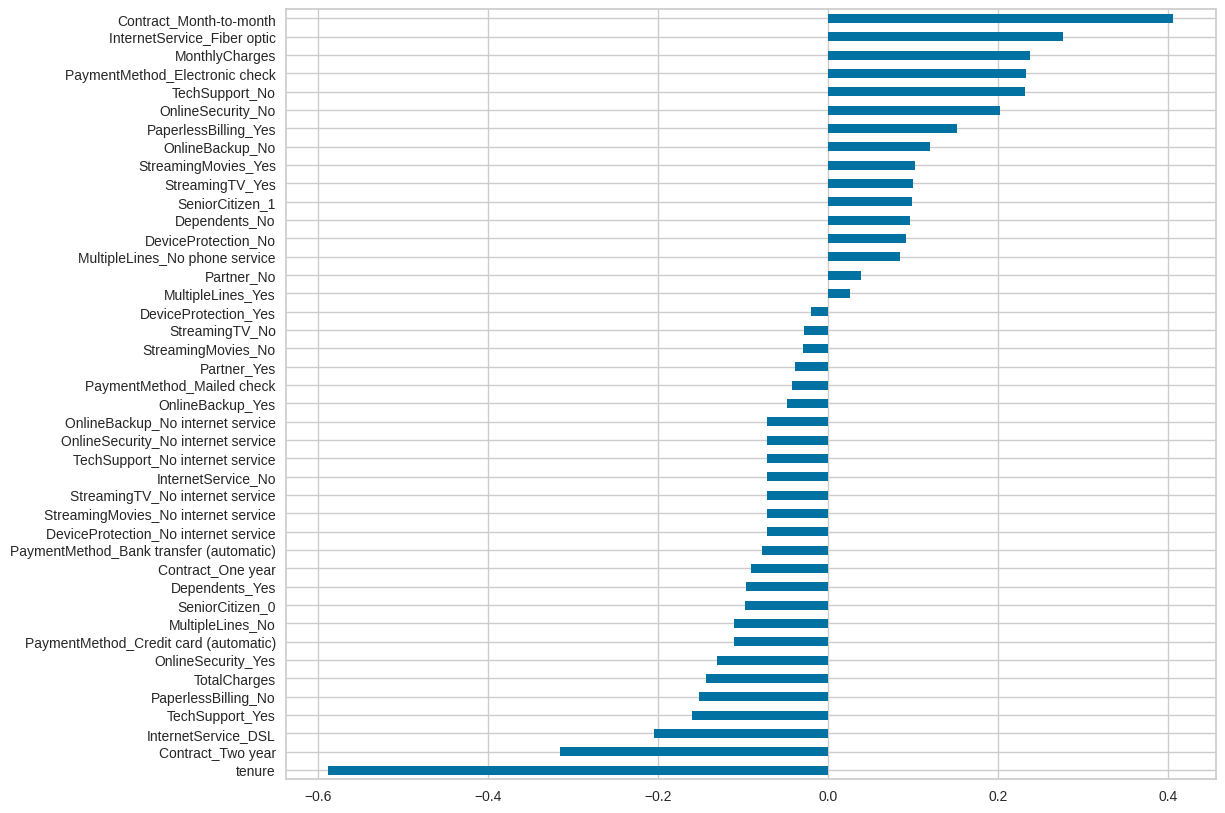

In [ ]:
plt.figure(figsize=(12,10))
pd.Series(lr_model.coef_[0], feature_names_in).sort_values().plot.barh()
plt.show()

In [ ]:
import pickle

In [ ]:
with open('model.pkl', 'wb') as file_handle:
  pickle.dump(model_pipeline, file_handle)

In [ ]:
model_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['SeniorCitizen', 'Partner',
                                                   'Dependents',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('model',
                 LogisticRegressionCV(class_weight='balanced', max_iter=500))])

In [ ]:
import pickle

with open('model.pkl', 'rb') as file_handle:
  modelo_salvo = pickle.load(file_handle)

In [ ]:
modelo_salvo.predict(df)

array([1, 0, 1, ..., 1, 1, 0])

In [ ]:
modelo_salvo.predict_proba(df)[:,1]

array([0.71019255, 0.21885807, 0.58180187, ..., 0.56838746, 0.84136823,
       0.17093477])

In [ ]:
'''

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Validación cruzada
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
mean_cv_accuracy = np.mean(cv_scores)
print(f"Mean Cross-Validated Accuracy: {mean_cv_accuracy}")

'''